In [196]:
import numpy as np
from sklearn import linear_model 
from sklearn.datasets import make_regression 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation

In [197]:
# generate some synthetic dataset
np.random.seed(30)
x =  np.random.randint(0,100,(100,1))
y =  (3*x[:,0]+np.random.randint(50,300,100)).reshape(-1,1)

m = x.shape[0]
n = x.shape[1]

# create Linear Regression model using an intercept term 
reg_intercept = linear_model.LinearRegression(fit_intercept=False) 
# fit a linear regression model (with intercept)
reg_intercept = reg_intercept.fit(x, y)

idealw = reg_intercept.coef_
idealb = reg_intercept.intercept_
idealMSE = np.mean((y - (idealw*x+idealb))**2)

In [198]:
def batch(X,y,batchSize):
    for i in range(0,X.shape[0],batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

In [199]:
def grad_descent(X,y,weights,lrate):
    
    n = X.shape[1]
    m = X.shape[0]

    # Performing Gradient Descent  

    y_hat     = np.dot(X, weights)              # The current predicted value of y  
    der_w     = (-2/m)*np.dot(X.T,(y - y_hat))  # Derivative of MSE Loss function wrt w

    weights   = weights - lrate* der_w           # Update weight

    return weights

In [200]:
def minibatchGD(X,y,batchSize,epoches,lrate):    
    #weights    = np.zeros((X.shape[1],1))
    weights    = np.array([[-300]])
    
    Ws = [weights]

    for i in range(epoches):
        for X_batch,y_batch in batch(X,y,batchSize):
            weights  = grad_descent(X_batch,y_batch,weights,lrate)
            
            Ws.append(weights)

    return weights, Ws

In [201]:
weights, Ws = minibatchGD(x,y,100,2000,0.0001)
weights

array([[6.16844093]])

MSE    = 10924      MSE minibatchGD =  10924
weight = 6      weight minibatchGD =  6


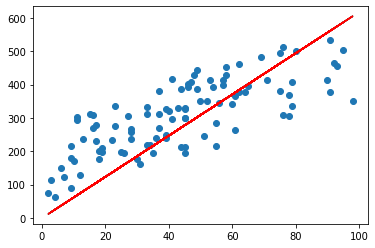

In [202]:
MSE = np.mean((y-(x*weights))**2)
space = '    '

print("MSE    =", '{:.0f}'.format(idealMSE),space,        "MSE minibatchGD = ", '{:.0f}'.format(MSE))
print("weight =", '{:.0f}'.format(idealw[0][0]),space, "weight minibatchGD = ", '{:.0f}'.format(weights[0][0]))

fig, axes = plt.subplots(1,1)

axes.scatter(x,y)
axes.plot(x,x*idealw, color='black')
axes.plot(x,x*weights, color='red')

plt.show()

In [203]:
Ws = np.array(Ws).reshape(-1,1)

In [204]:
# calculate MSE loss 
Y_hat = np.dot(x, Ws.T) 
MSE = np.mean((y-Y_hat)**2, axis=0)

In [205]:
# coordinates for plotting linear predictors with different weight
x_coord = [x.min(), x.max()]
y_coord = []
for i in range(Y_hat.shape[1]):
    y_temp = Y_hat[:,i]
    y_coord.append([y_temp[np.argmin(x)], y_temp[np.argmax(x)]])  

### minibatchGD, plot only weight

In [206]:
# tangent line (derivative of MSE function) at the chosen weight value    
def tgline(x,y,slope):
    tgxrange = np.array([x-10, x+10])
    tgline   = slope*(tgxrange - x) + y      
    return tgline

In [207]:
# derivative of weight
der_w  = (-2/m)*np.dot(x.T,(y - Y_hat))
der_w  = der_w.reshape(-1,1)

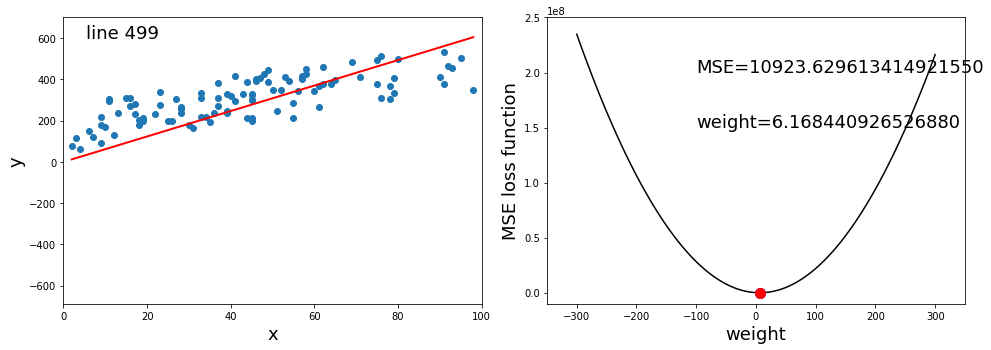

In [208]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
    

# data for plotting MSE function
weight    = np.linspace(-300,300,100)
loss_func = np.zeros((100,1))
for i, w in enumerate(weight):
    loss_func[i][0] = np.mean((y - w*x)**2)
    
# First set up the figure, the axis, and the plot element we want to animate
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.scatter(x, y) # plot data points
ax1.set_xlim(0, 100)
ax1.set_ylim(-29500, 700)
ax1.set_xlabel('x',fontsize=18)
ax1.set_ylabel('y', fontsize=18)
text1  = ax1.text(5.5, 600, 'line 0',fontsize=18)
line1, = ax1.plot(x_coord, y_coord[0], 'r-', linewidth=2) # plot linear predictor function

ax2.plot(weight,loss_func, c='k') # plot MSE loss function
ax2.set_xlim(-350, 350)
ax2.set_ylim(-0.1e8, 2.5e8)
ax2.set_xlabel('weight', fontsize=18)
ax2.set_ylabel('MSE loss function', fontsize=18)

text21  = ax2.text(-100, 1.5e8, 'weight={:.15f}'.format(Ws[0][0]),fontsize=18)
text22  = ax2.text(-100, 2e8, 'MSE={:.15f}'.format(MSE[0]),fontsize=18)
line2,  = ax2.plot([Ws[0]-10, Ws[0]+10], tgline(Ws[0], MSE[0], der_w[0]), c='r') # plot tg line
point1, = ax2.plot(idealw, idealMSE, marker='o', ms =10, c='b')
point2, = ax2.plot(Ws[0], MSE[0], marker='o', ms =10, c='r')                          # and MSE at chosen weight

plt.tight_layout()

# animation function.  This is called sequentially
def animate(i):    
    line1.set_data(x_coord, y_coord[i])
    ax1.set_ylim(y_coord[i][0]-700, 700)
    text1.set_text('line '+ str(i))
 
    line2.set_data([Ws[i]-5, Ws[i]+5], tgline(Ws[i], MSE[i], der_w[i]))
    point2.set_data(Ws[i], MSE[i])
    text21.set_text('weight={:.15f}'.format(Ws[i][0]))
    text22.set_text('MSE={:.15f}'.format(MSE[i]))
    
    return line1, text1, line2, text21, text22

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=500, blit=True)

# save the animation as an mp4.  
anim.save('minibatchGD_noInt.mp4', fps=10)

plt.show()